# Creating and manipulating Qbits

In [20]:
import qse
import numpy as np

## 1. Create Qbits.

A `Qbits` object can represent : 

- An isolated molecule.
- A repeated structure. 

`Qbits` objects can be created in different ways. Let's see how it is done by performing providing some examples. 



### 1.1. Specify the atoms positions. $H_{2}O$.

The first way of creating a molecule or a crystal is by specifying the `positions` of their qubits in the *cartesian coordinate system*. With the `labels` parameter we are assigning a label to each atom. 


In [32]:
h_1_coordinates = np.array([[0.76, 0, 0.58]])
h_2_coordinates = np.array([[-0.76, 0, 0.58]])
o_coordinates = np.array([[0, 0, 0]])
positions = np.concatenate(
    (
    h_1_coordinates,
    h_2_coordinates,
    o_coordinates
    ),
    axis = 0
)

labels = ['H', 'H', 'O']

h2o = qse.Qbits(
    positions = positions,
    labels = labels
)



### 1.2. Specify the cell positions. $CsCl$.

We can also create a qbit by inputting the unit cell coordinates into the `cell` argument. For the $CsCl$ the cell type is cubic. The `scaled_positions` argument is the position of the atoms, given in units of the unit cell. 


In [22]:
cell= np.array([
    [4.994, 0, 0], [0, 4.994, 0], [0, 0, 4.994]
    ]
) # cell is defined using coordinates.
scaled_positions = np.array([
    [0.0, 0.0, 0.0], [0.5, 0.5, 0.5]
    ]
)
labels = ['Cs', 'Cl']
cscl = qse.Qbits(
    cell = cell,
    scaled_positions = scaled_positions
)


### 1.3. Specify the lattice vectors and angles. $Bi_{2}O_{3}$. 

We can use the lattice vectors $a_1$, $a_2$, $a_3$ and the angles  $\alpha\angle a_2a_3$ ,  $\beta\angle a_1a_3$ , $\gamma\angle a_1a_2$, to define our cell instead of using its coordinates as we did before. For $Bi_{2}O_{3}$ we have that: 

$\alpha = \gamma = 90Â°, \beta = 112.48$, $a_1 = 5.87A$, $a_2 = 8.12A$, $a_3 = 7.45A$






In [23]:
a1 = 4.13
a2 = 4.13
a3 = 6.91
alpha = 90.00 
beta = 90.00
gamma = 120.00
cell = [a1,a2,a3, alpha,beta, gamma] #cell is defined using lattice vectors and angles
bi = [0,0,0]
mn = [0.33, 0.66, 0.25]
scaled_positions = np.array([bi, mn])
labels = ['Bi', 'Bi', 'O', 'O', 'O']
bi2o3 = qse.Qbits(
    cell=cell,
    scaled_positions=scaled_positions
    )

### 1.4. Add single `Qbit` objects.

Single `Qbit` objects can be added to form a `Qbits` object. Let's build again the $H_{2}O$ this way.

In [24]:
h_qbit_1 = qse.Qbit(
    position=h_1_coordinates.flatten().tolist(),
    label='H'
)
h_qbit_2 = qse.Qbit(
    position=h_2_coordinates.flatten().tolist(),
    label='H'
)
o_qbit = qse.Qbit(
    position=o_coordinates.flatten().tolist(),
    label='O'
)

h2o_e = qse.Qbits()
h2o_e.extend(h_qbit_1)
h2o_e.extend(h_qbit_2)
h2o_e.extend(o_qbit)



## 2. Qbits methods.

### 2.1. Generate and draw qbits. 

After the cells are created, we can use the `repeat` method to generate lattices. The argument of `repeat` can be a sequence of three integers indicating the number of repetitions on each direction or a simple integer indicating equal repetition on each direction. Once the lattice is created, we can use the `draw` method to visualise it. 

Lattice of $CsCl$:

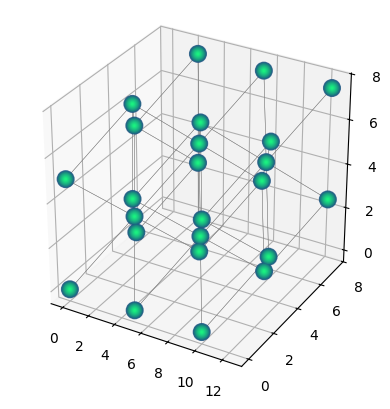

In [45]:
cscl_lattice = cscl.repeat((3,2,2))
cscl_lattice.draw(radius='nearest')

Lattice of $Bi_{2}O_{3}$:

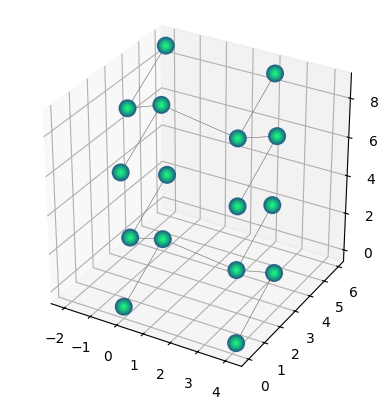

In [46]:

bi2o3_lattice = bi2o3.repeat(2)
bi2o3_lattice.draw(radius='nearest')

### 2.2. Translate lattices.

We can translate our lattice using the `translate` method, to which we can input an xyz vector that dictates how much the lattice is translated in each direction. 

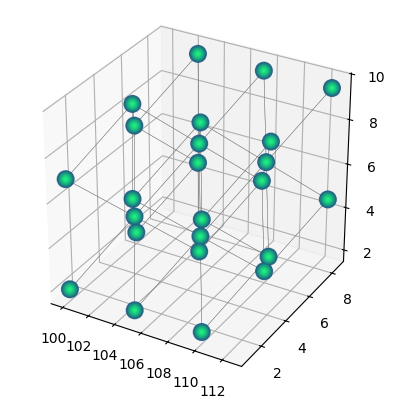

In [47]:
cscl_lattice.translate((100,1,2))
cscl_lattice.draw(radius='nearest')

Translations of the lattice can also be made using the `set_centroid` method, as one can see below.

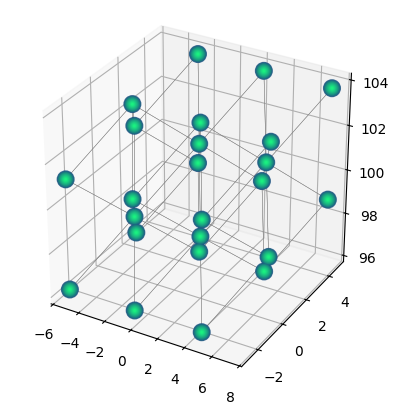

In [48]:
cscl_lattice.set_centroid((1,1,100))
cscl_lattice.draw(radius='nearest')

### 2.3. Rotate lattices

One can use the method `rotate` to perform lattice rotations, specifying the angle and the axis along which the rotation will be performed. 

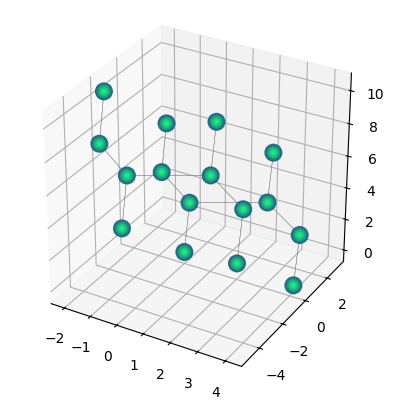

In [50]:
bi2o3_lattice.rotate(45, v='x', rotate_cell=True)
bi2o3_lattice.draw(radius='nearest')

With the method `euler_rotate` we can rotate a lattice by inputting the angles $\phi$, $\theta$, $\psi$ in degrees, as shown below. 

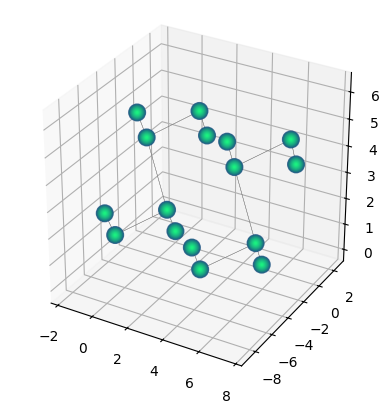

In [52]:
bi2o3_lattice.euler_rotate(30, 80, 70)
bi2o3_lattice.draw(radius='nearest')